# 数据初探

In [7]:
import pandas as pd

data_train = pd.read_csv("input/HR.csv")
data_train.iloc[:5, :]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 查看数据列信息

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 列数据信息

- RangeIndex => 索引
- satisfaction_level => 满意度
- last_evaluation => 最近一次的评估
- number_project =>  项目数
- average_montly_hours => 
- time_spend_company => 平均月工作时间
- Work_accident => 花在公司的时间
- left => 是否发生过工伤事故
- promotion_last_5years => 在过去5年中是否有升值
- sales => 
- salary => 工资是否可以达到预期

## 数据描述

In [9]:
data_train.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 数据初步分析

## 各属性分布

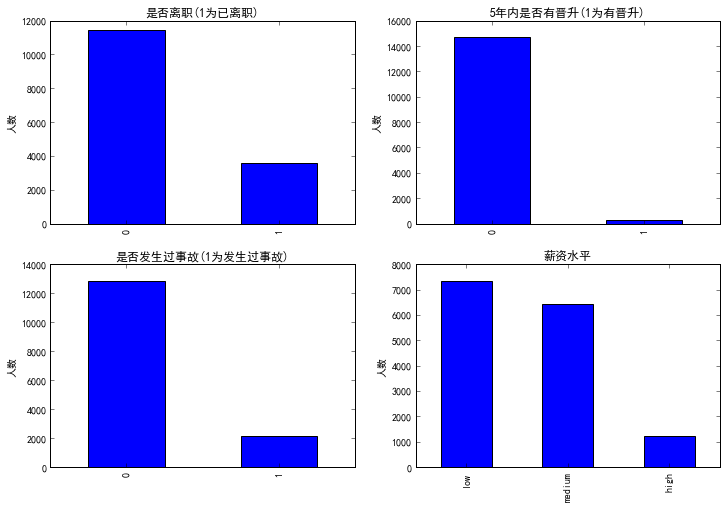

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

plt.subplot2grid((2, 2), (0, 0))
data_train.left.value_counts().plot(kind="bar")
plt.title("是否离职(1为已离职)")
plt.ylabel("人数")

plt.subplot2grid((2, 2), (0, 1))
data_train.promotion_last_5years.value_counts().plot(kind="bar")
plt.title("5年内是否有晋升(1为有晋升)")
plt.ylabel("人数")

plt.subplot2grid((2, 2), (1, 0))
data_train.Work_accident.value_counts().plot(kind="bar")
plt.title("是否发生过事故(1为发生过事故)")
plt.ylabel("人数")

plt.subplot2grid((2, 2), (1, 1))
data_train.salary.value_counts().plot(kind="bar")
plt.title("薪资水平")
plt.ylabel("人数")

plt.show()

## 属性与离职结果的关联统计

### 看看各薪资水平与离职结果的关联统计

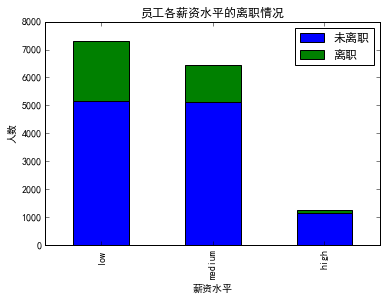

In [19]:
left_0 = data_train.salary[data_train.left == 0].value_counts()
left_1 = data_train.salary[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("员工各薪资水平的离职情况")
plt.xlabel("薪资水平")
plt.ylabel("人数")
plt.show()

### 是否有晋升与离职结果的关联统计

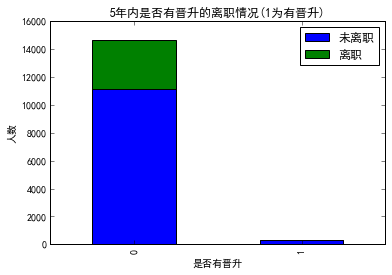

In [24]:
left_0 = data_train.promotion_last_5years[data_train.left == 0].value_counts()
left_1 = data_train.promotion_last_5years[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("5年内是否有晋升的离职情况(1为有晋升)")
plt.xlabel("是否有晋升")
plt.ylabel("人数")
plt.show()

### 是否发生过事故与离职结果的关联统计

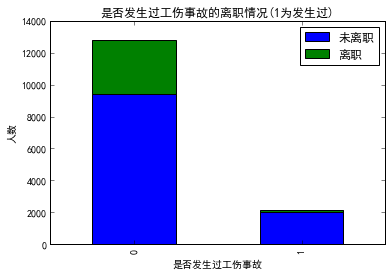

In [26]:
left_0 = data_train.Work_accident[data_train.left == 0].value_counts()
left_1 = data_train.Work_accident[data_train.left == 1].value_counts()
df = pd.DataFrame({"离职": left_1, "未离职": left_0})
df.plot(kind="bar", stacked=True)
plt.title("是否发生过工伤事故的离职情况(1为发生过)")
plt.xlabel("是否发生过工伤事故")
plt.ylabel("人数")
plt.show()